In [435]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# all entry signals
df = pd.read_csv('./data/tradelog_IS.csv', index_col = 0)



# all trades, valid hours = [13,15,19,21], timstop = 40
# df = pd.read_csv('./data/tradelog_IS_all_trades_validhours_ts40.csv', index_col = 0)

# one open, valid hours = [13,15,19,21], timstop = 40
# df = pd.read_csv('./data/tradelog_IS_oneopen_valid hours_timestop40hr.csv', index_col = 0)

In [436]:
df['open_time_fmt'] = pd.to_datetime(df['open_time']).dt.time

In [437]:
# IS or OS
# df = df[df['open_time']< '2023-05-31']

Text(20.75, 125, 'Sydney Open')

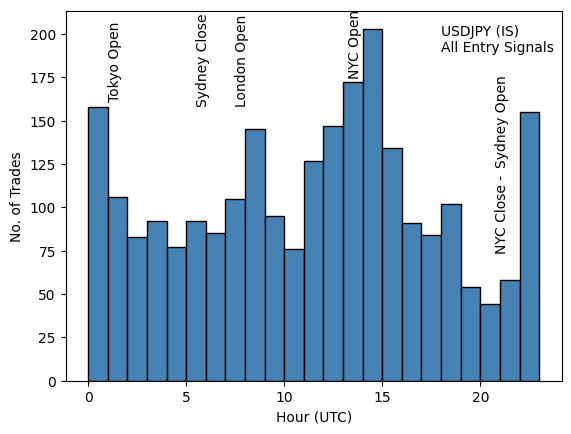

In [438]:
data = pd.to_datetime(df['open_time']).dt.hour
bin_width = 1
bins = np.arange(min(data), max(data) + bin_width, bin_width)
plt.hist(pd.to_datetime(df['open_time']).dt.hour, bins = bins, color='steelblue', edgecolor = 'black')


plt.xlabel('Hour (UTC)')
plt.ylabel('No. of Trades')
plt.text(18,190,'USDJPY (IS)\nAll Entry Signals')
plt.text(1,163,'Tokyo Open', rotation = 90)
plt.text(5.5,160,'Sydney Close', rotation = 90)
plt.text(7.5,160,'London Open', rotation = 90)
plt.text(13.25,176,'NYC Open', rotation = 90)
plt.text(20.75,75,'NYC Close -', rotation = 90)
plt.text(20.75,125,'Sydney Open', rotation = 90)

In [439]:
df['time_in_trade'] = (pd.to_datetime(df['close_time']) - pd.to_datetime(df['open_time']))/pd.Timedelta(hours = 1)
print('mode: ',df['time_in_trade'].mode())
print('mean: ',df['time_in_trade'].mean())
print('median: ',df['time_in_trade'].median())
# plt.hist(pd.to_datetime(df['open_time']).dt.hour, bins = 24)

mode:  0    0.083333
Name: time_in_trade, dtype: float64
mean:  38.754292421193824
median:  23.583333333333332


Text(150, 130, 'USDJPY (IS)\nAll Entry Signals')

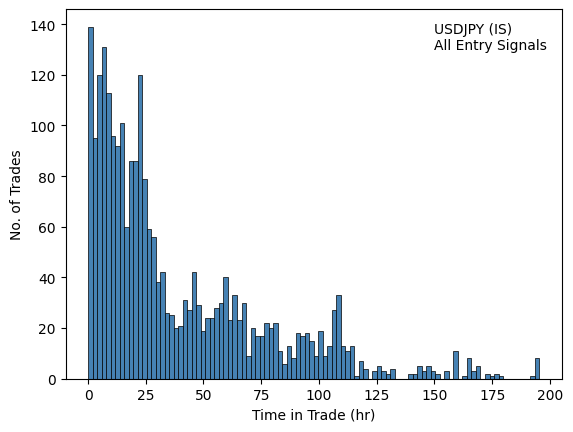

In [440]:
plt.hist(df['time_in_trade'], bins = 100,color='steelblue', edgecolor = 'black',linewidth = 0.5)
plt.xlabel('Time in Trade (hr)')
plt.ylabel('No. of Trades')
plt.text(150,130,'USDJPY (IS)\nAll Entry Signals')


In [441]:
hourly_summary = pd.DataFrame(index = [i for i in range(24)],columns = ['win_rate', 'PnL', 'no_trades','av_time_in_trade_wins', 'av_time_in_trade_losses', 'av_R'])



In [442]:
import numpy as np
import math as m
band = 1

for h in hourly_summary.index:
    # print(h)
    dg = df[pd.to_datetime(df['open_time']).dt.hour == h]

    dg['entry'] = np.where(dg['dir'].astype(float) ==1 ,dg['open_price'].apply(lambda x: m.floor(x)), dg['open_price'].apply(lambda x: m.ceil(x)) )
    # print(dg['entry'])
    
    dg['R'] = ((dg['entry'] + band*dg['dir'])  - dg['open_price'])/(dg['open_price'] - (dg['entry'] - band*dg['dir']))
    
    no_trades = len(dg)
    wins = len(dg[dg['PnL']>0])
    
    de = dg[dg['PnL']>0]
    db = dg[dg['PnL']<0]
    
    PnL = dg['PnL'].sum()
    dg

    if no_trades == 0:
        hourly_summary.loc[h,'win_rate'] = 0
    else:
        hourly_summary.loc[h,'win_rate'] = wins/no_trades
    
    hourly_summary.loc[h,'PnL']     = PnL
    hourly_summary.loc[h,'no_trades'] = no_trades

    hourly_summary.loc[h,'av_time_in_trade_wins'] = de['time_in_trade'].median()
    hourly_summary.loc[h,'av_time_in_trade_losses'] = db['time_in_trade'].median()
    hourly_summary.loc[h,'av_R'] = dg['R'].mean()



for h in hourly_summary.index:
    # print(h)
    dg = df[pd.to_datetime(df['open_time']).dt.hour == h]
    no_trades = len(dg)
    hourly_summary.loc[h,'prob_hr']     =  no_trades/hourly_summary['no_trades'].sum()
    hourly_summary.loc[h,'EV_hr']       = hourly_summary.loc[h,'prob_hr']*hourly_summary.loc[h,'PnL']





/var/folders/8t/m0nq83vd5l361mq6g6xqbjwh0000gp/T/ipykernel_23387/3037661767.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dg['entry'] = np.where(dg['dir'].astype(float) ==1 ,dg['open_price'].apply(lambda x: m.floor(x)), dg['open_price'].apply(lambda x: m.ceil(x)) )
/var/folders/8t/m0nq83vd5l361mq6g6xqbjwh0000gp/T/ipykernel_23387/3037661767.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dg['R'] = ((dg['entry'] + band*dg['dir'])  - dg['open_price'])/(dg['open_price'] - (dg['entry'] - band*dg['dir'

In [443]:
hourly_summary['break_even_wr%'] = 1./(1. + hourly_summary['av_R'])

In [444]:
hourly_summary

,win_rate,PnL,no_trades,av_time_in_trade_wins,av_time_in_trade_losses,av_R,prob_hr,EV_hr,break_even_wr%
0,0.537975,3.425345,158,24.916667,24.416667,0.88832,0.063581,0.217789,0.529571
1,0.518868,-1.658505,106,26.666667,25.25,0.87363,0.042656,-0.070745,0.533723
2,0.433735,-16.339424,83,19.416667,17.25,0.858161,0.033400,-0.545743,0.538167
3,0.554348,6.160606,92,11.916667,10.333333,0.906092,0.037022,0.228079,0.524634
4,0.558442,5.430891,77,20.416667,20.5,0.905432,0.030986,0.168281,0.524815
5,0.478261,-8.280621,92,18.833333,22.25,0.916009,0.037022,-0.306566,0.521918
6,0.505882,-2.766454,85,25.916667,21.958333,0.918444,0.034205,-0.094627,0.521256
7,0.504762,-4.832538,105,23.0,25.791667,0.898257,0.042254,-0.204192,0.526799
8,0.544828,3.169712,145,25.833333,29.333333,0.874232,0.058350,0.184953,0.533552
9,0.536842,1.614225,95,28.333333,27.583333,0.898147,0.038229,0.061711,0.52683


<BarContainer object of 24 artists>

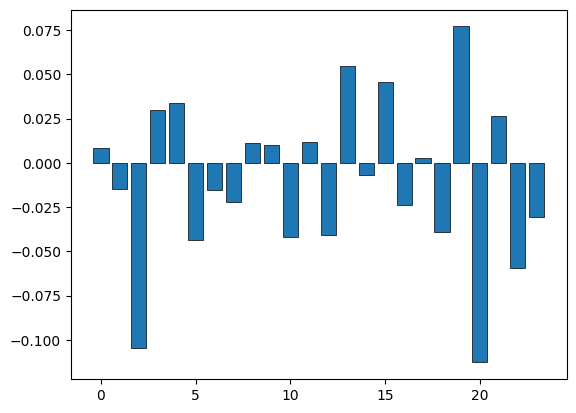

In [445]:
plt.bar(hourly_summary.index,hourly_summary['win_rate'] - hourly_summary['break_even_wr%'],edgecolor = 'black',linewidth = 0.5 )

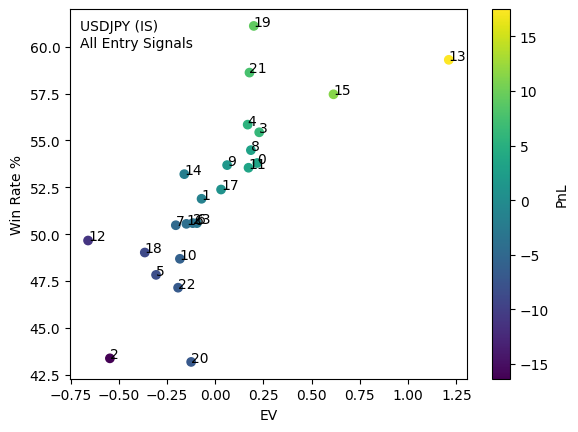

In [446]:
g = plt.scatter(x=hourly_summary['EV_hr'], y = 100*hourly_summary['win_rate'],c=hourly_summary['PnL'])

for i in hourly_summary.index:
    plt.text(hourly_summary.loc[i,'EV_hr'], 100*hourly_summary.loc[i,'win_rate'],i)


plt.xlabel('EV')
plt.ylabel('Win Rate %')
plt.text(-0.7,60,'USDJPY (IS)\nAll Entry Signals')
colorbar = plt.colorbar(g)
colorbar.set_label('PnL')


21


Text(0, 0.5, 'no. trades')

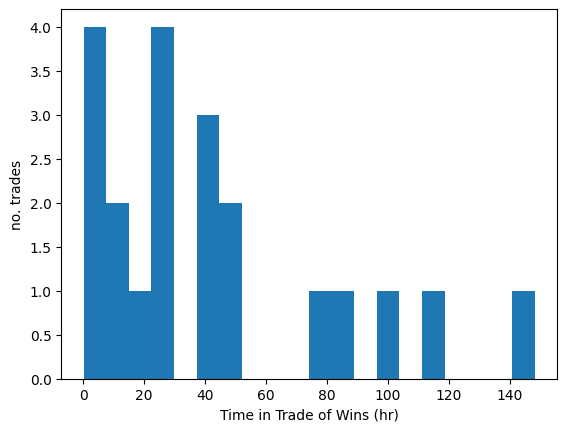

In [447]:
hour = 19
dh = df[pd.to_datetime(df['open_time']).dt.hour == hour]
dh = dh[dh['PnL']<0]
print(len(dh))
plt.hist(dh['time_in_trade'],bins = 20)

plt.xlabel('Time in Trade of Wins (hr)')
plt.ylabel('no. trades')
# plt.text(-0.7,60,'USDJPY (IS)\nAll Entry Signals')


Text(18, 1.1, 'USDJPY (IS)\nAll Entry Signals')

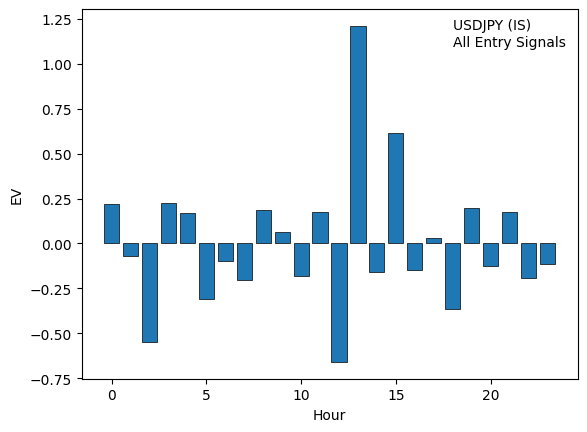

In [448]:
plt.bar(hourly_summary.index,hourly_summary['EV_hr'],edgecolor = 'black',linewidth = 0.5 )
plt.xlabel('Hour')
plt.ylabel('EV')
plt.text(18,1.1,'USDJPY (IS)\nAll Entry Signals')

In [449]:
int(df['time_in_trade'].max())

195

In [450]:

time_in_trade_summary = pd.DataFrame(index = [i for i in range(int(df['time_in_trade'].max()+1)) ], columns = ['win_rate','PnL','no_trades','prob','EV(t)'])

for h in time_in_trade_summary.index:
    # print(h)
    dg = df[df['time_in_trade'].astype(int) == h]
    # print(dg)

    no_trades = len(dg)
    wins = len(dg[dg['PnL']>0])
    PnL = dg['PnL'].sum()

    if no_trades == 0:
        time_in_trade_summary.loc[h,'win_rate'] = 0
    else:
        time_in_trade_summary.loc[h,'win_rate'] = wins/no_trades
    
    time_in_trade_summary.loc[h,'PnL']     = PnL
    time_in_trade_summary.loc[h,'no_trades'] = no_trades
    

for h in time_in_trade_summary.index:
    no_trades = time_in_trade_summary.loc[h,'no_trades']
    time_in_trade_summary.loc[h,'prob'] = no_trades/time_in_trade_summary['no_trades'].sum()

for h in time_in_trade_summary.index:
    dg = time_in_trade_summary[time_in_trade_summary.index >= h]
    time_in_trade_summary.loc[h,'EV(t)'] = (dg['prob']*dg['PnL']).sum()

In [451]:
t = time_in_trade_summary[time_in_trade_summary['no_trades']!= 0]
time_in_trade_summary.head(20)

,win_rate,PnL,no_trades,prob,EV(t)
0,0.7,12.992962,80,0.032193,0.2844
1,0.576923,2.891736,52,0.020926,-0.133885
2,0.568627,2.585111,51,0.020523,-0.194396
3,0.529412,0.331733,51,0.020523,-0.247451
4,0.553846,2.339402,65,0.026157,-0.254259
5,0.581818,6.050797,55,0.022133,-0.315451
6,0.540984,1.310267,61,0.024547,-0.449372
7,0.520548,-0.90719,73,0.029376,-0.481535
8,0.484375,-5.17386,64,0.025755,-0.454885
9,0.55102,2.376952,49,0.019718,-0.321635


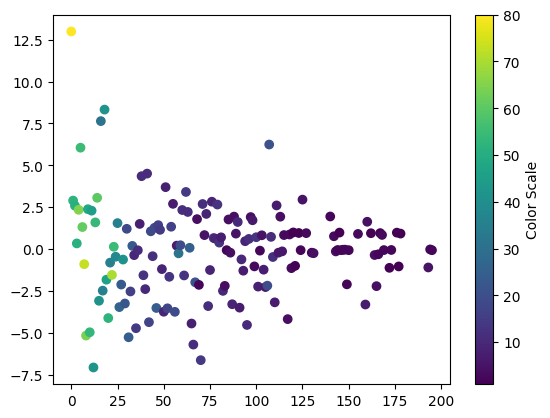

In [452]:
fig = plt.scatter(t.index,t['PnL'],c = t['no_trades'])
colorbar = plt.colorbar(fig)
colorbar.set_label('Color Scale')

<BarContainer object of 60 artists>

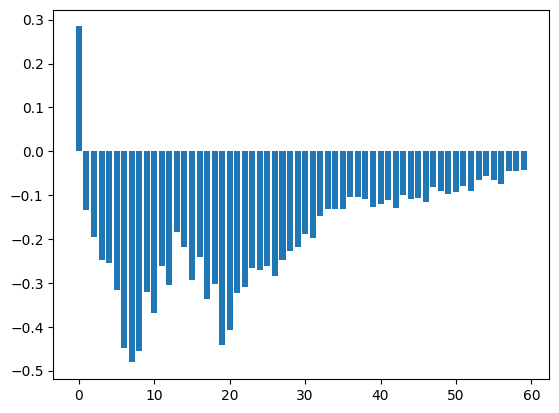

In [453]:
plt.bar(time_in_trade_summary.head(60).index,time_in_trade_summary['EV(t)'].head(60))

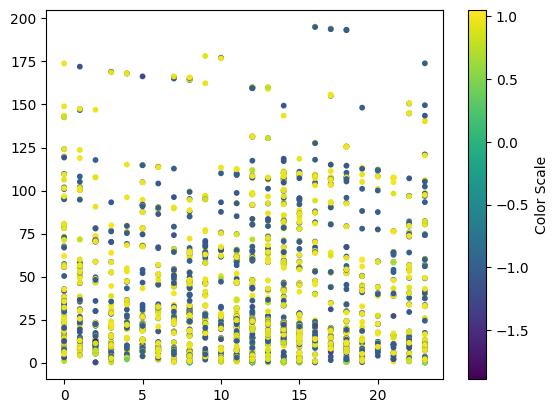

In [454]:
f =plt.scatter(pd.to_datetime(df['open_time']).dt.hour, df['time_in_trade'], s = 10,c = df['PnL'], marker= 'o')
colorbar = plt.colorbar(f)
colorbar.set_label('Color Scale')

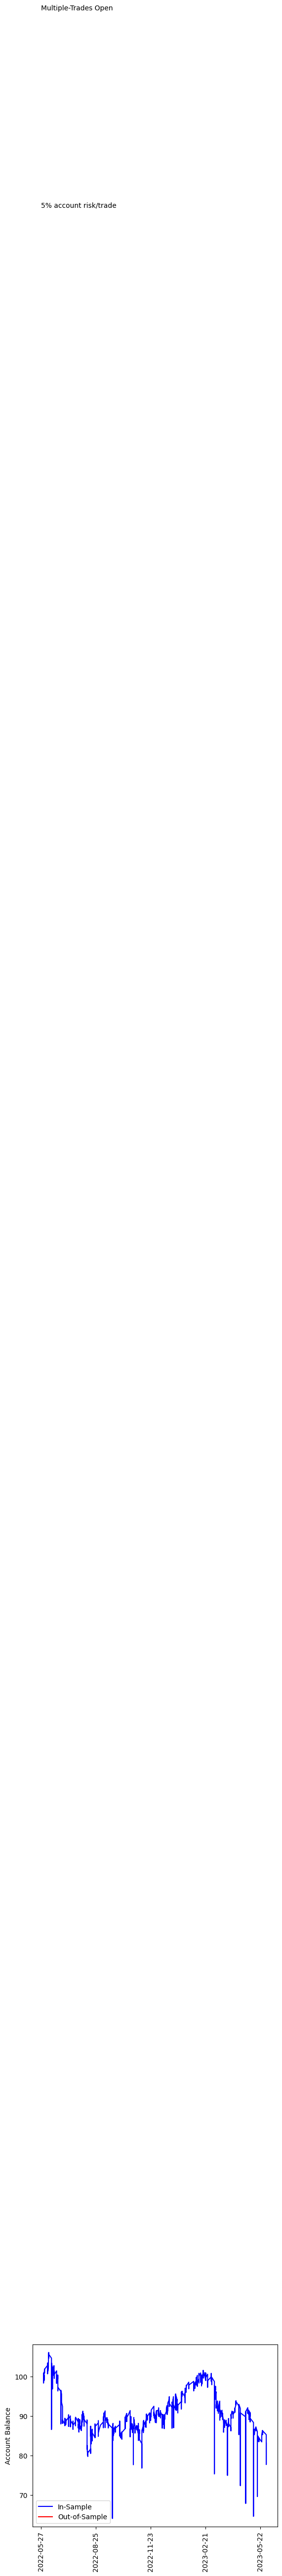

In [455]:

df = df.set_index(pd.to_datetime(df['open_time']))
IS_df = df[df['open_time'] < '2023-05-31']
OS_df = df[df['open_time'] >= '2023-05-31']

df['xlabels'] = df['open_time'].apply(lambda x: x[:10])

xdates = pd.date_range(start = df.index.min(), end = df.index.max(), freq = 'D')


plt.plot(pd.to_datetime(IS_df['close_time']),IS_df['account_balance(t)'],label='In-Sample',color = 'blue')
plt.plot(pd.to_datetime(OS_df['open_time']),OS_df['account_balance(t)'],label='Out-of-Sample',color = 'red')
plt.xticks(ticks = xdates[::90],labels = xdates[::90].date, rotation = 90)
plt.ylabel('Account Balance')
plt.text(xdates[0], 700, 'Multiple-Trades Open')
plt.text(xdates[0],650,'5% account risk/trade')
plt.legend()

In [456]:
df

,strat_id,instrument,open_time,open_price,close_time,close_price,dir,size,PnL,account_balance(t),open_time_fmt,time_in_trade,xlabels
open_time,,,,,,,,,,,,,
2022-05-27 00:35:00+00:00,2,C:USDJPY,2022-05-27 00:35:00+00:00,126.942826,2022-05-31 00:10:00+00:00,128,-1,1,-1.057174,98.942826,00:35:00,95.583333,2022-05-27
2022-05-27 00:55:00+00:00,2,C:USDJPY,2022-05-27 00:55:00+00:00,127.003175,2022-05-31 00:10:00+00:00,128,1,1,0.996825,99.939651,00:55:00,95.250000,2022-05-27
2022-05-27 01:10:00+00:00,2,C:USDJPY,2022-05-27 01:10:00+00:00,127.062176,2022-05-31 00:10:00+00:00,128,1,1,0.937824,100.877475,01:10:00,95.000000,2022-05-27
2022-05-27 01:30:00+00:00,2,C:USDJPY,2022-05-27 01:30:00+00:00,126.982825,2022-05-31 00:10:00+00:00,128,-1,1,-1.017175,99.860300,01:30:00,94.666667,2022-05-27
2022-05-27 06:45:00+00:00,2,C:USDJPY,2022-05-27 06:45:00+00:00,127.013175,2022-05-31 00:10:00+00:00,128,1,1,0.986825,100.847125,06:45:00,89.416667,2022-05-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-26 00:00:00+00:00,2,C:USDJPY,2023-05-26 00:00:00+00:00,139.983500,2023-05-31 23:25:00+00:00,139,-1,1,0.983500,79.655508,00:00:00,143.416667,2023-05-26
2023-05-26 00:30:00+00:00,2,C:USDJPY,2023-05-26 00:30:00+00:00,139.977500,2023-05-31 23:25:00+00:00,139,-1,1,0.977500,80.633009,00:30:00,142.916667,2023-05-26
2023-05-26 00:50:00+00:00,2,C:USDJPY,2023-05-26 00:50:00+00:00,139.811505,2023-05-31 23:25:00+00:00,139,-1,1,0.811505,81.444513,00:50:00,142.583333,2023-05-26


In [457]:
df['date'] =  pd.to_datetime(df['open_time']).dt.date
df['week_no'] = (pd.to_datetime(df['open_time']).dt.isocalendar()['week'])
df['month'] = (pd.to_datetime(df['open_time']).dt.month)
df['year'] = (pd.to_datetime(df['open_time']).dt.year)

In [458]:
# risk-return statistics
index = ['Daily', 'Weekly','Monthly']
columns = ['maxDD','Sharpe','E_returns', 'CumGrowthRate', 'vol']

perfomance_summary = pd.DataFrame(index = index, columns = columns)

In [459]:
s = ['date','week_no','month']
t = {'date':'Daily', 'week_no':'Weekly', 'month':'Monthly'}

#Daily
stats = df.groupby(by = 'date' ).agg(PnL = ('PnL','first'),\
                                        start_acc = ('account_balance(t)','first'),\
                                        end_acc = ('account_balance(t)','last'))
# print(stats)
    
stats['start_acc'] = stats['start_acc'] - stats['PnL']
stats['abs_return_pct'] = (stats['end_acc'] - stats['start_acc'])/stats['start_acc']

perfomance_summary.loc['Daily', 'maxDD'] = stats['abs_return_pct'].min()
perfomance_summary.loc['Daily', 'E_returns'] = stats['abs_return_pct'].mean()
perfomance_summary.loc['Daily', 'vol'] = stats['abs_return_pct'].std()



#Weekly
stats = df.groupby(by = ['year','week_no'] ).agg(PnL = ('PnL','first'),\
                                        start_acc = ('account_balance(t)','first'),\
                                        end_acc = ('account_balance(t)','last'))


stats['start_acc'] = stats['start_acc'] - stats['PnL']
stats['abs_return_pct'] = (stats['end_acc'] - stats['start_acc'])/stats['start_acc']

perfomance_summary.loc['Weekly', 'maxDD'] = stats['abs_return_pct'].min()
perfomance_summary.loc['Weekly', 'E_returns'] = stats['abs_return_pct'].mean()
perfomance_summary.loc['Weekly', 'vol'] = stats['abs_return_pct'].std()



#Monthly
stats = df.groupby(by = ['year','month'] ).agg(PnL = ('PnL','first'),\
                                        start_acc = ('account_balance(t)','first'),\
                                        end_acc = ('account_balance(t)','last'))


stats['start_acc'] = stats['start_acc'] - stats['PnL']
stats['abs_return_pct'] = (stats['end_acc'] - stats['start_acc'])/stats['start_acc']


perfomance_summary.loc['Monthly', 'maxDD'] = stats['abs_return_pct'].min()
perfomance_summary.loc['Monthly', 'E_returns'] = stats['abs_return_pct'].mean()
perfomance_summary.loc['Monthly', 'vol'] = stats['abs_return_pct'].std()


# print(stats)

In [460]:
import math as m
dtime = pd.to_datetime(df['open_time'].max()) - pd.to_datetime(df['open_time'].min())
no_day  = dtime.days
no_weeks = no_day/7
no_months = 12*(no_weeks/52)
no_years = no_day/365
df = df.set_index(pd.to_datetime(df['open_time']))

In [461]:
perfomance_summary.loc['Daily','CumGrowthRate'] = (1/(no_day))*m.log(df['account_balance(t)'].tail(1).values[0]/df['account_balance(t)'].head().values[0])
perfomance_summary.loc['Weekly','CumGrowthRate'] = (1/(no_weeks))*m.log(df['account_balance(t)'].tail(1).values[0]/df['account_balance(t)'].head().values[0])
perfomance_summary.loc['Monthly','CumGrowthRate'] = (1/(no_months))*m.log(df['account_balance(t)'].tail(1).values[0]/df['account_balance(t)'].head().values[0])

In [462]:
yearly_ret = (1/(no_years))*m.log(df['account_balance(t)'].tail(1).values[0]/df['account_balance(t)'].head().values[0])
rfr = 0.04

perfomance_summary.loc['Daily','Sharpe'] = (yearly_ret - rfr)/(m.sqrt(252)*perfomance_summary.loc['Daily','vol'])
perfomance_summary.loc['Weekly','Sharpe'] = (yearly_ret - rfr)/(m.sqrt(52)*perfomance_summary.loc['Weekly','vol'])
perfomance_summary.loc['Monthly','Sharpe'] = (yearly_ret - rfr)/(m.sqrt(12)*perfomance_summary.loc['Monthly','vol'])


In [463]:
perfomance_summary

,maxDD,Sharpe,E_returns,CumGrowthRate,vol
Daily,-0.25821,-0.230556,0.000317,-0.000472,0.05805
Weekly,-0.255207,-0.38848,-0.006088,-0.003307,0.075842
Monthly,-0.125215,-0.994019,-0.012246,-0.014332,0.061701
